In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
dataset = pd.read_csv('dataset.csv')
processed_dataset = pd.read_csv('processed_dataset.csv')
num_features = np.load('numeric_features.npy')
dataset.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


## Data distribution

<AxesSubplot:title={'center':'Numeric data distribution'}, xlabel='Total Household Income', ylabel='Count'>

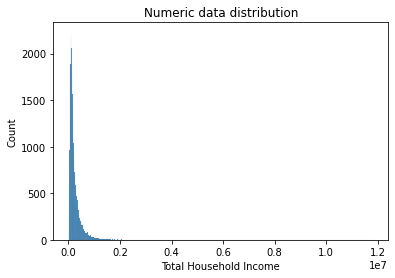

In [39]:
plt.title('Numeric data distribution')
sns.histplot(x='Total Household Income', data=dataset)

<AxesSubplot:xlabel='target', ylabel='count'>

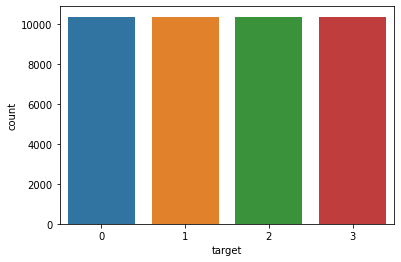

In [40]:
sns.countplot(x='target', data=processed_dataset)

## Features

<AxesSubplot:>

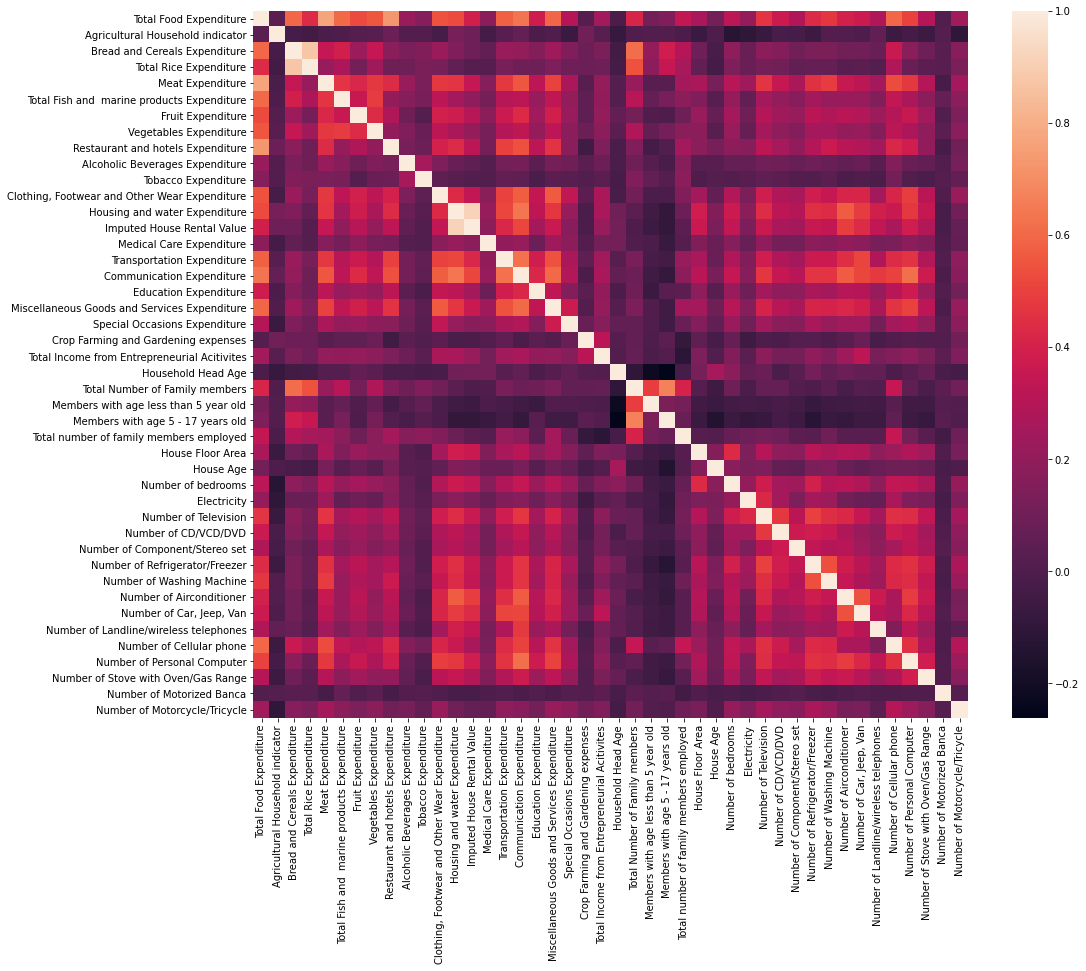

In [46]:
plt.figure(figsize=(16, 13))
sns.heatmap(processed_dataset[num_features].corr())